In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pickle

data_df = pickle.load(open('/home/adrien/Téléchargements/online_retail_II.p', 'rb'))
data_df = data_df.dropna()

In [3]:
product_counts = data_df['Description'].value_counts()
filtered_df = data_df[data_df['Description'].isin(product_counts[product_counts > 10].index)]

In [4]:
len(filtered_df.groupby('StockCode'))

3081

In [5]:
filtered_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


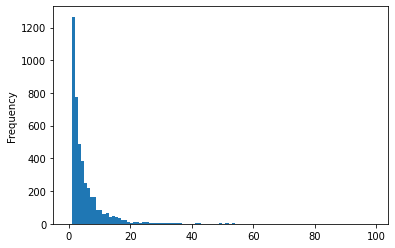

In [6]:
def plot_customer_freq(df):
    basket_counts_by_customer = df.groupby(['Invoice', 'Customer ID']).count().groupby('Customer ID')['StockCode'].count()
    basket_counts_by_customer.plot.hist(bins=np.arange(100))

plot_customer_freq(filtered_df)

In [7]:
def prepare_count_data(data_df):   
    baskets_data = data_df.groupby(['Customer ID', 'Invoice'])['Description'].value_counts()
    baskets_data_df = pd.DataFrame(data=baskets_data.values, index=baskets_data.index,
                                   columns=['Count']).reset_index()
    counts_df = baskets_data_df.pivot(index=['Customer ID', 'Invoice'], columns=['Description'],
                                      values=['Count'])['Count']
    counts_df.fillna(0, inplace=True)
    return counts_df

counts_df = prepare_count_data(filtered_df)

In [8]:
counts_df

Description            DOORMAT UNION JACK GUNS AND ROSES  \
Customer ID Invoice                                        
12346.0     491725                                   0.0   
            491742                                   0.0   
            491744                                   0.0   
            492718                                   0.0   
            492722                                   0.0   
...                                                  ...   
18287.0     508581                                   0.0   
            523289                                   0.0   
            523290                                   0.0   
            534346                                   0.0   
            C489592                                  0.0   

Description           3 STRIPEY MICE FELTCRAFT  \
Customer ID Invoice                              
12346.0     491725                         0.0   
            491742                         0.0   
            491744                         0.0   
            492718                         0.0   
            492722                         0.0   
...                                        ...   
18287.0     508581                         0.0   
            523289                         0.0   
            523290                         0.0   
            534346                         0.0   
            C489592                        0.0   

Description           4 PURPLE FLOCK DINNER CANDLES   ANIMAL STICKERS  \
Customer ID Invoice                                                     
12346.0     491725                              0.0               0.0   
            491742                              0.0               0.0   
            491744                              0.0               0.0   
            492718                              0.0               0.0   
            492722                              0.0               0.0   
...                                             ...               ...   
18287.0     508581                              0.0               0.0   
            523289                              0.0               0.0   
            523290                              0.0               0.0   
            534346                              0.0               0.0   
            C489592                             0.0               0.0   

Description           BLACK PIRATE TREASURE CHEST  \
Customer ID Invoice                                 
12346.0     491725                            0.0   
            491742                            0.0   
            491744                            0.0   
            492718                            0.0   
            492722                            0.0   
...                                           ...   
18287.0     508581                            0.0   
            523289                            0.0   
            523290                            0.0   
            534346                            0.0   
            C489592                           0.0   

Description           CHERRY BLOSSOM  DECORATIVE FLASK   FLAMINGO LIGHTS  \
Customer ID Invoice                                                        
12346.0     491725                                 0.0               0.0   
            491742                                 0.0               0.0   
            491744                                 0.0               0.0   
            492718                                 0.0               0.0   
            492722                                 0.0               0.0   
...                                                ...               ...   
18287.0     508581                                 0.0               0.0   
            523289                                 0.0               0.0   
            523290                                 0.0               0.0   
            534346                                 0.0               0.0   
            C489

In [9]:
product_counts = counts_df.sum(axis=0)

In [10]:
product_counts[product_counts<10].index

Index([], dtype='object', name='Description')

In [11]:
unique_customer_ids = filtered_df['Customer ID'].unique()
np.random.shuffle(unique_customer_ids)
nb_train = int(len(unique_customer_ids) * 0.8)
train_grocery_df = filtered_df[filtered_df['Customer ID'].isin(unique_customer_ids[:nb_train])]
test_grocery_df = filtered_df[filtered_df['Customer ID'].isin(unique_customer_ids[nb_train:])]

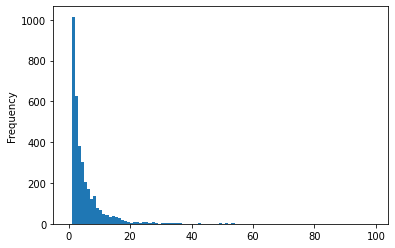

In [12]:
plot_customer_freq(train_grocery_df)

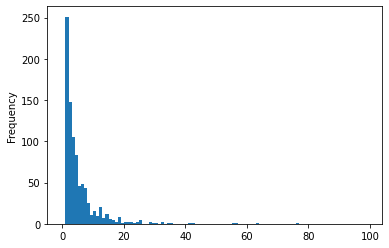

In [13]:
plot_customer_freq(test_grocery_df)

In [14]:
train_counts_df = prepare_count_data(train_grocery_df)

In [15]:
train_counts_df

Description            DOORMAT UNION JACK GUNS AND ROSES  \
Customer ID Invoice                                        
12346.0     491725                                   0.0   
            491742                                   0.0   
            491744                                   0.0   
            492718                                   0.0   
            492722                                   0.0   
...                                                  ...   
18287.0     508581                                   0.0   
            523289                                   0.0   
            523290                                   0.0   
            534346                                   0.0   
            C489592                                  0.0   

Description           3 STRIPEY MICE FELTCRAFT  \
Customer ID Invoice                              
12346.0     491725                         0.0   
            491742                         0.0   
            491744                         0.0   
            492718                         0.0   
            492722                         0.0   
...                                        ...   
18287.0     508581                         0.0   
            523289                         0.0   
            523290                         0.0   
            534346                         0.0   
            C489592                        0.0   

Description           4 PURPLE FLOCK DINNER CANDLES   ANIMAL STICKERS  \
Customer ID Invoice                                                     
12346.0     491725                              0.0               0.0   
            491742                              0.0               0.0   
            491744                              0.0               0.0   
            492718                              0.0               0.0   
            492722                              0.0               0.0   
...                                             ...               ...   
18287.0     508581                              0.0               0.0   
            523289                              0.0               0.0   
            523290                              0.0               0.0   
            534346                              0.0               0.0   
            C489592                             0.0               0.0   

Description           BLACK PIRATE TREASURE CHEST  \
Customer ID Invoice                                 
12346.0     491725                            0.0   
            491742                            0.0   
            491744                            0.0   
            492718                            0.0   
            492722                            0.0   
...                                           ...   
18287.0     508581                            0.0   
            523289                            0.0   
            523290                            0.0   
            534346                            0.0   
            C489592                           0.0   

Description           CHERRY BLOSSOM  DECORATIVE FLASK   FLAMINGO LIGHTS  \
Customer ID Invoice                                                        
12346.0     491725                                 0.0               0.0   
            491742                                 0.0               0.0   
            491744                                 0.0               0.0   
            492718                                 0.0               0.0   
            492722                                 0.0               0.0   
...                                                ...               ...   
18287.0     508581                                 0.0               0.0   
            523289                                 0.0               0.0   
            523290                                 0.0               0.0   
            534346                                 0.0               0.0   
            C489

In [16]:
test_counts_df = prepare_count_data(test_grocery_df)

In [17]:
test_counts_df

Description            DOORMAT UNION JACK GUNS AND ROSES  \
Customer ID Invoice                                        
12356.0     526245                                   0.0   
            532305                                   0.0   
            534804                                   0.0   
12361.0     495719                                   0.0   
            507426                                   0.0   
...                                                  ...   
18271.0     490789                                   0.0   
            503982                                   0.0   
18280.0     532092                                   0.0   
            C534828                                  0.0   
18281.0     507699                                   0.0   

Description           3 STRIPEY MICE FELTCRAFT  \
Customer ID Invoice                              
12356.0     526245                         0.0   
            532305                         0.0   
            534804                         0.0   
12361.0     495719                         0.0   
            507426                         0.0   
...                                        ...   
18271.0     490789                         0.0   
            503982                         0.0   
18280.0     532092                         0.0   
            C534828                        0.0   
18281.0     507699                         0.0   

Description           4 PURPLE FLOCK DINNER CANDLES   ANIMAL STICKERS  \
Customer ID Invoice                                                     
12356.0     526245                              0.0               0.0   
            532305                              0.0               0.0   
            534804                              0.0               0.0   
12361.0     495719                              0.0               0.0   
            507426                              0.0               0.0   
...                                             ...               ...   
18271.0     490789                              0.0               0.0   
            503982                              0.0               0.0   
18280.0     532092                              0.0               0.0   
            C534828                             0.0               0.0   
18281.0     507699                              0.0               0.0   

Description           BLACK PIRATE TREASURE CHEST  \
Customer ID Invoice                                 
12356.0     526245                            0.0   
            532305                            0.0   
            534804                            0.0   
12361.0     495719                            0.0   
            507426                            0.0   
...                                           ...   
18271.0     490789                            0.0   
            503982                            0.0   
18280.0     532092                            0.0   
            C534828                           0.0   
18281.0     507699                            0.0   

Description           CHERRY BLOSSOM  DECORATIVE FLASK   FLAMINGO LIGHTS  \
Customer ID Invoice                                                        
12356.0     526245                                 0.0               0.0   
            532305                                 0.0               0.0   
            534804                                 0.0               0.0   
12361.0     495719                                 0.0               0.0   
            507426                                 0.0               0.0   
...                                                ...               ...   
18271.0     490789                                 0.0               0.0   
            503982                                 0.0               0.0   
18280.0     532092                                 0.0               0.0   
            C534828                                0.0               0.0   
18281.0     5076